# Unsupervised Lab Session

## Learning outcomes:
- Exploratory data analysis and data preparation for model building.
- PCA for dimensionality reduction.
- K-means and Agglomerative Clustering

## Problem Statement
Based on the given marketing campigan dataset, segment the similar customers into suitable clusters. Analyze the clusters and provide your insights to help the organization promote their business.

## Context:
- Customer Personality Analysis is a detailed analysis of a company’s ideal customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors and concerns of different types of customers.
- Customer personality analysis helps a business to modify its product based on its target customers from different types of customer segments. For example, instead of spending money to market a new product to every customer in the company’s database, a company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment.

## About dataset
- Source: https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis?datasetId=1546318&sortBy=voteCount

### Attribute Information:
- ID: Customer's unique identifier
- Year_Birth: Customer's birth year
- Education: Customer's education level
- Marital_Status: Customer's marital status
- Income: Customer's yearly household income
- Kidhome: Number of children in customer's household
- Teenhome: Number of teenagers in customer's household
- Dt_Customer: Date of customer's enrollment with the company
- Recency: Number of days since customer's last purchase
- Complain: 1 if the customer complained in the last 2 years, 0 otherwise
- MntWines: Amount spent on wine in last 2 years
- MntFruits: Amount spent on fruits in last 2 years
- MntMeatProducts: Amount spent on meat in last 2 years
- MntFishProducts: Amount spent on fish in last 2 years
- MntSweetProducts: Amount spent on sweets in last 2 years
- MntGoldProds: Amount spent on gold in last 2 years
- NumDealsPurchases: Number of purchases made with a discount
- AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
- AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
- AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
- AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
- AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
- Response: 1 if customer accepted the offer in the last campaign, 0 otherwise
- NumWebPurchases: Number of purchases made through the company’s website
- NumCatalogPurchases: Number of purchases made using a catalogue
- NumStorePurchases: Number of purchases made directly in stores
- NumWebVisitsMonth: Number of visits to company’s website in the last month

### 1. Import required libraries

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler,LabelEncoder
from scipy import stats
from sklearn.cluster import KMeans
from scipy.stats import zscore
from scipy.spatial import distance
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import Normalizer

### 2. Load the CSV file (i.e marketing.csv) and display the first 5 rows of the dataframe. Check the shape and info of the dataset.

In [2]:
df = pd.read_csv('marketing.csv')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,1957,Graduation,Single,58138.0,0,0,4/9/2012,58,635,...,10,4,7,0,0,0,0,0,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,8/3/2014,38,11,...,1,2,5,0,0,0,0,0,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,2,10,4,0,0,0,0,0,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,10/2/2014,26,11,...,0,4,6,0,0,0,0,0,0,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,3,6,5,0,0,0,0,0,0,0


In [3]:
df.shape

(2240, 27)

### 3. Check the percentage of missing values? If there is presence of missing values, treat them accordingly.

In [4]:
percent_missing = df.isnull().sum() * 100 / len(df)
print(percent_missing)

ID                     0.000000
Year_Birth             0.000000
Education              0.000000
Marital_Status         0.000000
Income                 1.071429
Kidhome                0.000000
Teenhome               0.000000
Dt_Customer            0.000000
Recency                0.000000
MntWines               0.000000
MntFruits              0.000000
MntMeatProducts        0.000000
MntFishProducts        0.000000
MntSweetProducts       0.000000
MntGoldProds           0.000000
NumDealsPurchases      0.000000
NumWebPurchases        0.000000
NumCatalogPurchases    0.000000
NumStorePurchases      0.000000
NumWebVisitsMonth      0.000000
AcceptedCmp3           0.000000
AcceptedCmp4           0.000000
AcceptedCmp5           0.000000
AcceptedCmp1           0.000000
AcceptedCmp2           0.000000
Complain               0.000000
Response               0.000000
dtype: float64


In [5]:
mean_value=df['Income'].mean()
df['Income'].fillna(value=mean_value, inplace=True)

In [6]:
percent_missing = df.isnull().sum() * 100 / len(df)
print(percent_missing)

ID                     0.0
Year_Birth             0.0
Education              0.0
Marital_Status         0.0
Income                 0.0
Kidhome                0.0
Teenhome               0.0
Dt_Customer            0.0
Recency                0.0
MntWines               0.0
MntFruits              0.0
MntMeatProducts        0.0
MntFishProducts        0.0
MntSweetProducts       0.0
MntGoldProds           0.0
NumDealsPurchases      0.0
NumWebPurchases        0.0
NumCatalogPurchases    0.0
NumStorePurchases      0.0
NumWebVisitsMonth      0.0
AcceptedCmp3           0.0
AcceptedCmp4           0.0
AcceptedCmp5           0.0
AcceptedCmp1           0.0
AcceptedCmp2           0.0
Complain               0.0
Response               0.0
dtype: float64


### 4. Check if there are any duplicate records in the dataset? If any drop them.

In [7]:
len(df[df.duplicated()])

0

Note: Since there are no duplicates we are not going to do any duplicates processing here 

### 5. Drop the columns which you think redundant for the analysis 

Note: To group the customer I believe that Id, Date the customer has joined and Number of visits per month are redundant as they dont define a customer

In [8]:
df = df.drop(columns=['ID','Dt_Customer' , 'NumWebVisitsMonth'],axis = 1)

### 6. Check the unique categories in the column 'Marital_Status'
- i) Group categories 'Married', 'Together' as 'relationship'
- ii) Group categories 'Divorced', 'Widow', 'Alone', 'YOLO', and 'Absurd' as 'Single'.

In [9]:
df['Marital_Status'].unique() 

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [10]:
df['Marital_Status'] =df['Marital_Status'].replace(['Married','Together'],'relationship')

In [11]:
df['Marital_Status'] =df['Marital_Status'].replace(['Divorced', 'Widow', 'Alone', 'YOLO', 'Absurd'],'Single')

In [12]:
df['Marital_Status'].value_counts() 

relationship    1444
Single           796
Name: Marital_Status, dtype: int64

### 7. Group the columns 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', and 'MntGoldProds' as 'Total_Expenses'

In [13]:
col_names = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts','MntGoldProds']
df['Total_Expenses'] = df[col_names].sum(axis = 1)

### 8. Group the columns 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', and 'NumDealsPurchases' as 'Num_Total_Purchases'

In [14]:
col_names = ['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumDealsPurchases']
df['Num_Total_Purchases'] = df[col_names].sum(axis = 1)

### 9. Group the columns 'Kidhome' and 'Teenhome' as 'Kids'

In [15]:
col_names = ['Kidhome','Teenhome']
df['Kids'] = df[col_names].sum(axis = 1)

### 10. Group columns 'AcceptedCmp1 , 2 , 3 , 4, 5' and 'Response' as 'TotalAcceptedCmp'

In [16]:
col_names = ['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','Response']
df['TotalAcceptedCmp'] = df[col_names].sum(axis = 1)

### 11. Drop those columns which we have used above for obtaining new features

In [17]:
df = df.drop(['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts','MntGoldProds',],axis=1)

In [18]:
df = df.drop(['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumDealsPurchases'],axis = 1)

In [19]:
df = df.drop(['Kidhome', 'Teenhome'],axis = 1)

In [20]:
df = df.drop(['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','Response'],axis = 1)

In [21]:
df.head()

,Year_Birth,Education,Marital_Status,Income,Recency,Complain,Total_Expenses,Num_Total_Purchases,Kids,TotalAcceptedCmp
0,1957,Graduation,Single,58138.0,58,0,1617,25,0,1
1,1954,Graduation,Single,46344.0,38,0,27,6,2,0
2,1965,Graduation,relationship,71613.0,26,0,776,21,0,0
3,1984,Graduation,relationship,26646.0,26,0,53,8,1,0
4,1981,PhD,relationship,58293.0,94,0,422,19,1,0


### 12. Extract 'age' using the column 'Year_Birth' and then drop the column 'Year_birth'

In [22]:
from datetime import date
df['age'] = date.today().year-df['Year_Birth']

In [23]:
df=df.drop('Year_Birth',axis=1)

In [24]:
df.head()

,Education,Marital_Status,Income,Recency,Complain,Total_Expenses,Num_Total_Purchases,Kids,TotalAcceptedCmp,age
0,Graduation,Single,58138.0,58,0,1617,25,0,1,66
1,Graduation,Single,46344.0,38,0,27,6,2,0,69
2,Graduation,relationship,71613.0,26,0,776,21,0,0,58
3,Graduation,relationship,26646.0,26,0,53,8,1,0,39
4,PhD,relationship,58293.0,94,0,422,19,1,0,42


In [25]:
dfc = df.copy()

### 13. Encode the categorical variables in the dataset

In [26]:
object_type_variables = [i for i in df.columns if df.dtypes[i]== object]
object_type_variables



['Education', 'Marital_Status']

In [27]:
categorical_columns = ['Education', 'Marital_Status']
le = LabelEncoder()
for i in categorical_columns:
        df[i] = df[[i]].apply(le.fit_transform)

In [28]:
df.head()

,Education,Marital_Status,Income,Recency,Complain,Total_Expenses,Num_Total_Purchases,Kids,TotalAcceptedCmp,age
0,2,0,58138.0,58,0,1617,25,0,1,66
1,2,0,46344.0,38,0,27,6,2,0,69
2,2,1,71613.0,26,0,776,21,0,0,58
3,2,1,26646.0,26,0,53,8,1,0,39
4,4,1,58293.0,94,0,422,19,1,0,42


### 14. Standardize the columns, so that values are in a particular range

In [29]:
df1 = df.copy()
scaled_features = StandardScaler().fit_transform(df1.values)
scaled_features_df = pd.DataFrame(scaled_features, index=df1.index, columns=df1.columns)

In [30]:
scaled_features_df.head()

,Education,Marital_Status,Income,Recency,Complain,Total_Expenses,Num_Total_Purchases,Kids,TotalAcceptedCmp,age
0,-0.350141,-1.346874,0.235327,0.307039,-0.097282,1.679417,1.320826,-1.264505,0.621248,0.985345
1,-0.350141,-1.346874,-0.235826,-0.383664,-0.097282,-0.961275,-1.154596,1.396361,-0.501912,1.235733
2,-0.350141,0.742460,0.773633,-0.798086,-0.097282,0.282673,0.799685,-1.264505,-0.501912,0.317643
3,-0.350141,0.742460,-1.022732,-0.798086,-0.097282,-0.918094,-0.894025,0.065928,-0.501912,-1.268149
4,1.428354,0.742460,0.241519,1.550305,-0.097282,-0.305254,0.539114,0.065928,-0.501912,-1.017761


### 15. Apply PCA on the above dataset and determine the number of PCA components to be used so that 90-95% of the variance in data is explained by the same.

In [31]:
cov_matrix = np.cov(scaled_features_df.T)

In [32]:
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)

In [33]:
total = sum(eig_vals)
var_exp = [ (i/total)*100  for i in sorted(eig_vals,reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print('Variance Explained: ',var_exp)
print('Cummulative Variance Explained: ',cum_var_exp)

Variance Explained:  [28.26991605813606, 12.561558881024212, 10.50865212261789, 10.148898225632209, 9.962833994455519, 8.379399168715425, 7.198242940813635, 6.882143140591899, 4.462262869565129, 1.6260925984480261]
Cummulative Variance Explained:  [ 28.26991606  40.83147494  51.34012706  61.48902529  71.45185928
  79.83125845  87.02950139  93.91164453  98.3739074  100.        ]


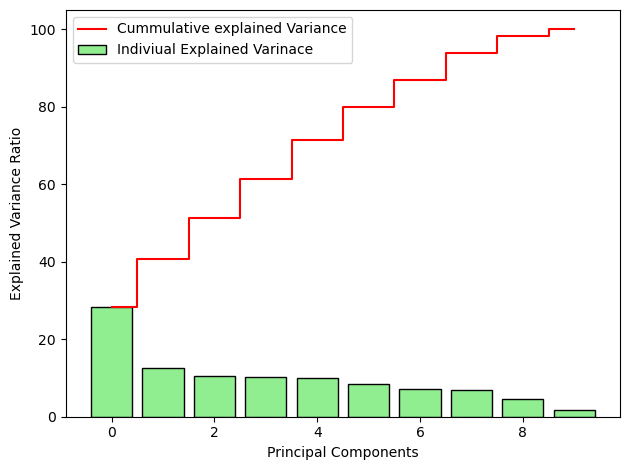

In [34]:
plt.bar(range(10),var_exp, align='center',color='lightgreen',edgecolor='black',label='Indiviual Explained Varinace')
plt.step(range(10), cum_var_exp, where='mid',color='red',label='Cummulative explained Variance')
plt.legend(loc = 'best')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.tight_layout()
plt.show()

Note: from the above diagram we can see that 90-95% of variance is explained by 8 Principal Components

In [35]:
pca=PCA(n_components = 8)
pca.fit(scaled_features_df)

PCA(n_components=8)

In [36]:
data_pca = pca.transform(scaled_features_df)
data_pca = pd.DataFrame(data_pca,columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8'])
data_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
0,2.400155,-0.158359,0.173616,1.144961,-0.710607,0.848982,0.096911,-0.662632
1,-1.685353,1.035254,-0.631526,1.211321,-0.192947,1.249851,0.506366,0.066299
2,1.153913,-0.282523,0.102553,-0.793783,0.714669,0.729036,-0.902543,-0.673988
3,-1.783079,-1.119112,-0.444958,-0.785361,0.587718,-0.323594,-0.389894,0.057251
4,0.010566,0.590941,0.817011,-0.838955,-0.982988,-1.680099,-0.762159,0.594821


### 16. Apply K-means clustering and segment the data (Use PCA transformed data for clustering)

In [37]:
cluster_range = range(2,15)
cluster_errors = []

for num_clusters in cluster_range:
   
    clusters = KMeans(num_clusters, n_init=10)
    clusters.fit(data_pca)
    
    labels = clusters.labels_
    centroids = clusters.cluster_centers_
    
    cluster_errors.append(clusters.inertia_)

clusters_df = pd.DataFrame({'num_clusters':cluster_range, 
                           'cluster_errors':cluster_errors})

clusters_df

,num_clusters,cluster_errors
0,2,16261.528839
1,3,14047.503454
2,4,13652.209216
3,5,11470.011549
4,6,10629.704592
5,7,9900.685206
6,8,9468.049108
7,9,9055.179587
8,10,8667.063936
9,11,8392.500166


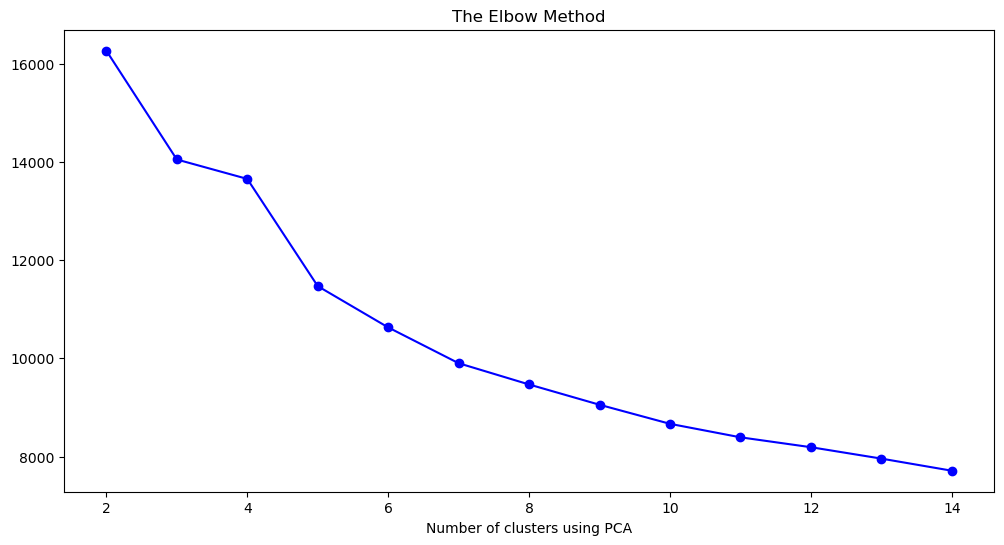

In [38]:
plt.figure(figsize=[12,6])
plt.title('The Elbow Method')
plt.xlabel('Number of clusters using PCA')
plt.plot(clusters_df['num_clusters'],clusters_df['cluster_errors'],marker='o',color='b')
plt.show()

In [39]:
from sklearn.metrics import silhouette_score

kmeans_score = []

for i in range(2,15):
    kmeans = KMeans(n_clusters=i)
    kmeans = kmeans.fit(data_pca)
    labels = kmeans.predict(data_pca)
    print(i,silhouette_score(data_pca,labels))

2 0.2294120496948811
3 0.1973593544802651
4 0.20879092830699425
5 0.18275437393114277
6 0.1635926001805969
7 0.1744878243623688
8 0.1682571668289811
9 0.16607370905906546
10 0.1626413318810903
11 0.15995671074634424
12 0.15778651598844473
13 0.16384846608346607
14 0.16227250031087673


- From above we can observe that te Silhoutte Score is highest for 3 clusters. So we can choose optimal clustesrs as 3

In [40]:
kmeans = KMeans(n_clusters=3, random_state=105)
kmeans.fit(data_pca)

KMeans(n_clusters=3, random_state=105)

In [41]:
#converting the kmeans label into a Dataframe 
labels = pd.DataFrame(kmeans.labels_,columns=['label'])

In [42]:
##joining the Label DataFrame with the PCA_DF dataframe
kmeans_df = data_pca.join(labels)
kmeans_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,label
0,2.400155,-0.158359,0.173616,1.144961,-0.710607,0.848982,0.096911,-0.662632,0
1,-1.685353,1.035254,-0.631526,1.211321,-0.192947,1.249851,0.506366,0.066299,1
2,1.153913,-0.282523,0.102553,-0.793783,0.714669,0.729036,-0.902543,-0.673988,0
3,-1.783079,-1.119112,-0.444958,-0.785361,0.587718,-0.323594,-0.389894,0.057251,1
4,0.010566,0.590941,0.817011,-0.838955,-0.982988,-1.680099,-0.762159,0.594821,0


In [43]:
kmeans_df['label'].value_counts()

1    1147
0     856
2     237
Name: label, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

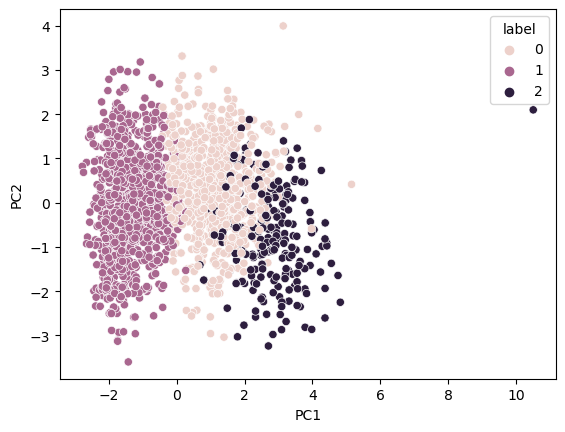

In [44]:
sns.scatterplot(kmeans_df['PC1'],kmeans_df['PC2'],hue = 'label',data = kmeans_df)
plt.show

### 17. Apply Agglomerative clustering and segment the data (Use Original data for clustering), and perform cluster analysis by doing bivariate analysis between the cluster label and different features and write your observations.

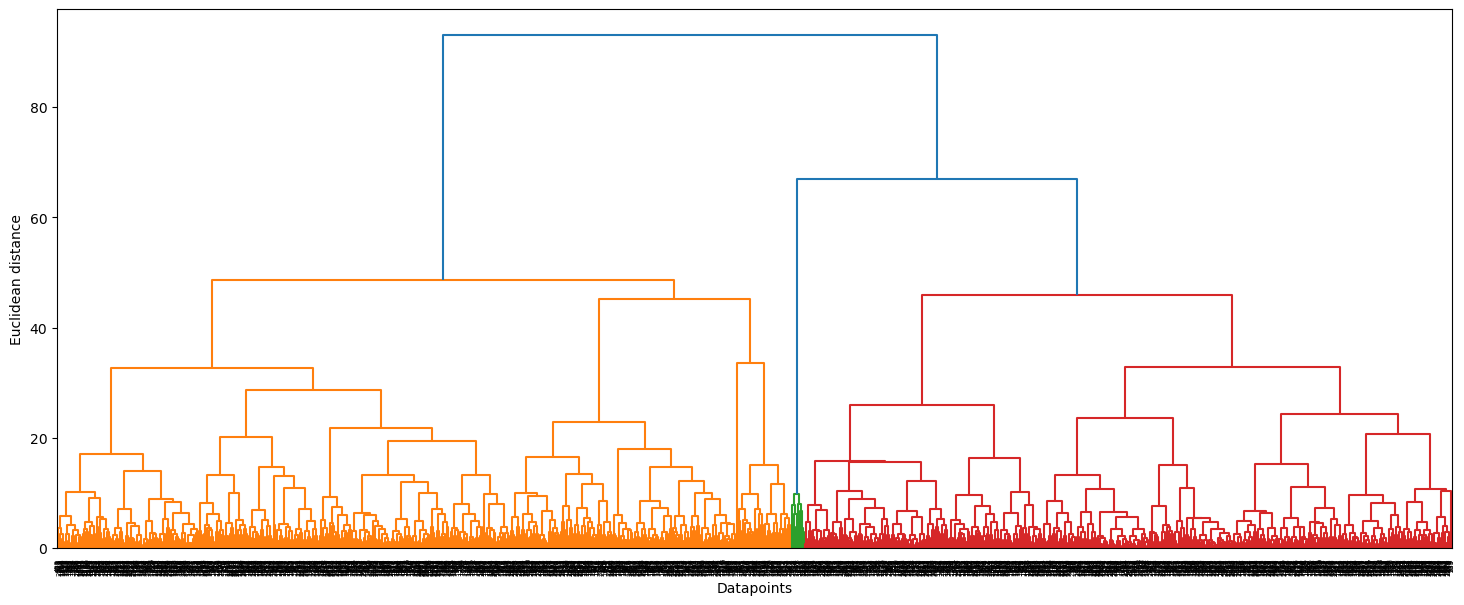

In [45]:
plt.figure(figsize=[18,7])
merg = linkage(scaled_features_df, method='ward')
dendrogram(merg, leaf_rotation=90,)
plt.xlabel('Datapoints')
plt.ylabel('Euclidean distance')
plt.show()

In [46]:
from sklearn.metrics import silhouette_score

In [47]:
for i in range(2,15):
    hier = AgglomerativeClustering(n_clusters = i)
    hier = hier.fit(scaled_features_df)
    labels = hier.fit_predict(scaled_features_df)
    print(i,silhouette_score(scaled_features_df,labels))

2 0.1953269278987601
3 0.20313571826900448
4 0.17395958717234267
5 0.14508245902819655
6 0.1553784680322984
7 0.1552619383470093
8 0.12893536402180128
9 0.11723007378493817
10 0.11995018104860722
11 0.1182900137805396
12 0.12042291646023351
13 0.11544079815492278
14 0.11642326253333647


- We can observe from the dendodram and the Silhouette scores for differnt clusters. The highest silhouette score is for 3 clusters.
- so lets choose the number of clusters as 3

In [48]:
hie_cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean',
                                     linkage='ward')
hie_cluster_model = hie_cluster.fit(scaled_features_df)

In [49]:
hie_label1 = pd.DataFrame(hie_cluster_model.labels_,columns = ['label'])
hie_label1.head()

,label
0,0
1,1
2,0
3,1
4,0


In [50]:
df_hier = dfc.join(hie_label1)
df_hier.head()

,Education,Marital_Status,Income,Recency,Complain,Total_Expenses,Num_Total_Purchases,Kids,TotalAcceptedCmp,age,label
0,Graduation,Single,58138.0,58,0,1617,25,0,1,66,0
1,Graduation,Single,46344.0,38,0,27,6,2,0,69,1
2,Graduation,relationship,71613.0,26,0,776,21,0,0,58,0
3,Graduation,relationship,26646.0,26,0,53,8,1,0,39,1
4,PhD,relationship,58293.0,94,0,422,19,1,0,42,0


### Visualization and Interpretation of results

<function matplotlib.pyplot.show(close=None, block=None)>

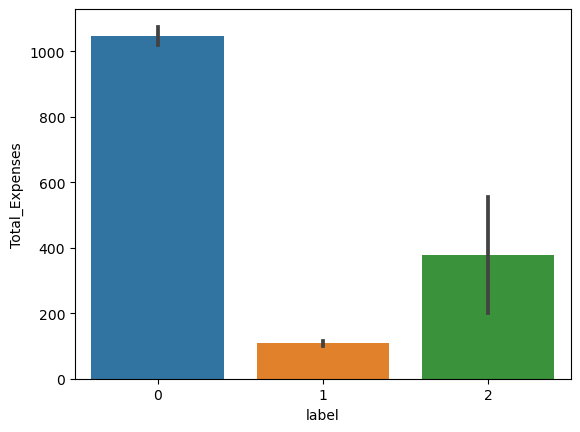

In [51]:
sns.barplot(df_hier['label'],df_hier['Total_Expenses'])
plt.show

- we can see that the Total_Expenses of cluster 0 is higher compared to that of cluster 1 and 2

<function matplotlib.pyplot.show(close=None, block=None)>

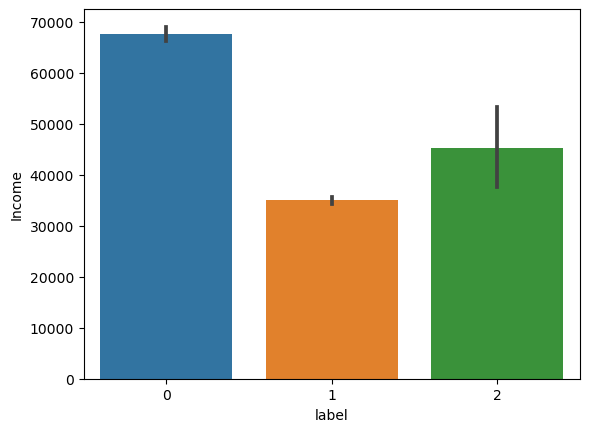

In [52]:
sns.barplot(df_hier['label'],df_hier['Income'])
plt.show

- The income is higher for cluster 0 followed by cluster 2

<function matplotlib.pyplot.show(close=None, block=None)>

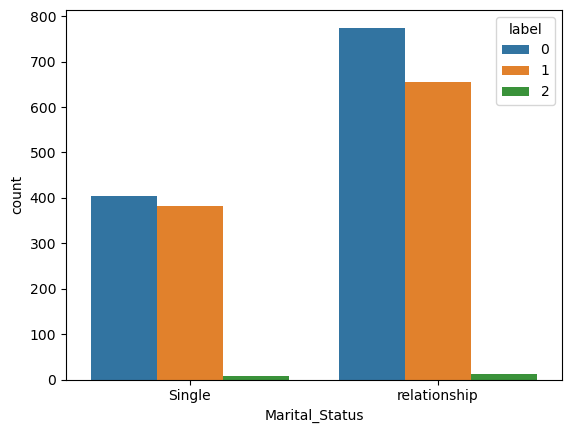

In [55]:
sns.countplot(df_hier['Marital_Status'],hue = 'label',data = df_hier)
plt.show

-we can observe that most of the customers who are in relationship falls under cluster 0 

<function matplotlib.pyplot.show(close=None, block=None)>

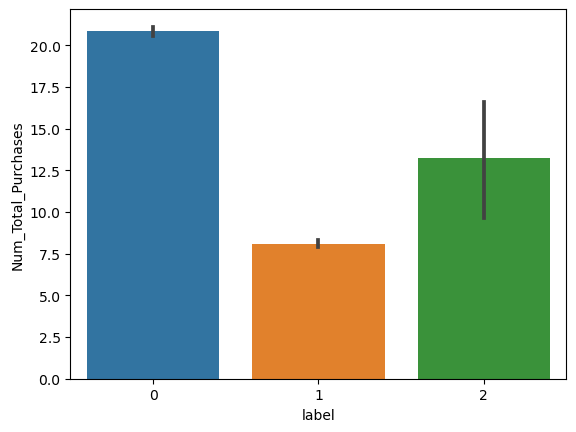

In [57]:
sns.barplot(df_hier['label'],df_hier['Num_Total_Purchases'])
plt.show

- the total number of purchases is also higher for customers from cluster 0 and then followe by customers of cluster 2

# Conlusion

We can conclude the following about the clusters
- Customers belonging to cluster 0 have maximum spending power, maximum income and does more purchases
- Customers belonging to cluster 2 have average income,average spending power
- Customers belonging to cluster 1 have least income,least number of purchases and least spending power. 

-----
## Happy Learning
-----